#  Understanding Descriptive Statistics

-  ### Population and Samples
-  ### Outliers

## Calculating Descriptive Statistics
- ### Measures of Central Tendency
- ### Measures of Variability
- ### Summary of Descriptive Statistics
- ### Measures of Correlation Between Pairs of Data

## Visualizing Data
-  ### Box Plots
-  ### Histograms
-  ### Pie Charts
-  ### Bar Charts

## Conclusion

In the era data science, a necessary aspect of working with data is the ability to describe, summarize, and represent data visually. Python statistics libraries are comprehensive, popular, and widely used tools that will assist you in working with data.

In this tutorial, you’ll learn:

- #### What numerical quantities you can use to describe and summarize your datasets
- #### How to calculate descriptive statistics in pure Python
- #### How to get descriptive statistics with available Python libraries
- #### How to visualize your datasets

# Understanding Descriptive Statistics

Descriptive statistics is just a way of describing and summarizing data. It uses two main approaches:

1. The quantitative approach describes and summarizes data numerically.
2. The visual approach illustrates data with charts, plots, histograms, and other graphs.

You can apply descriptive statistics to one or many datasets or variables. When you describe and summarize a single variable, you’re performing **univariate analysis**. When you search for statistical relationships among a pair of variables, you’re doing a **bivariate analysis**. Similarly, a **multivariate analysis** is concerned with multiple variables at once.

# Types of Measures

In this tutorial, you’ll learn about the following types of measures in descriptive statistics:

- **Central tendency** tells you about the centers of the data. Useful measures include the mean, median, and mode.
- **Variability** tells you about the spread of the data. Useful measures include variance and standard deviation.
- **Correlation** or joint variability tells you about the relation between a pair of variables in a dataset. Useful measures include covariance and the correlation coefficient.
---

# Population and Samples

In statistics, **the population** is a collection of objects, items (“units”) about which information is sought. Populations are often vast, which makes them inappropriate for collecting and analyzing data. That’s why statisticians usually try to make some conclusions about a population by choosing and examining a representative subset of that population.

This subset of a population is called a **sample**. Ideally, the sample should preserve the essential statistical features of the population to a satisfactory extent. That way, you’ll be able to use the sample to glean conclusions about the population.

# Outliers

An **outlier** is a data point that differs significantly from the majority of the data taken from a sample or population.

# Calculating Descriptive Statistics
Start by importing all the packages you’ll need:

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

Let’s create some data to work with. You’ll start with Python lists that contain some arbitrary numeric data:

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
x
x_with_nan

[8.0, 1, 2.5, nan, 4, 28.0]

Now, create np.ndarray and pd.Series objects that correspond to x and x_with_nan:

In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

y, y_with_nan
z, z_with_nan

(0     8.0
 1     1.0
 2     2.5
 3     4.0
 4    28.0
 dtype: float64,
 0     8.0
 1     1.0
 2     2.5
 3     NaN
 4     4.0
 5    28.0
 dtype: float64)

# Measures of Central Tendency

The measures of central tendency show the central or middle values of datasets. There are several definitions of what’s considered to be the center of a dataset. In this tutorial, you’ll learn how to identify and calculate these measures of central tendency:

- Mean
- Median
- Mode

# Mean

The **sample mean**, also called the sample **arithmetic mean** or simply the **average**, is the arithmetic average of all the items in a dataset. The mean of a dataset 𝑥 is mathematically expressed as **Σᵢ𝑥ᵢ/𝑛, where 𝑖 = 1, 2, …, 𝑛**. In other words, it’s the sum of all the elements 𝑥ᵢ divided by the number of items in the dataset 𝑥.

You can calculate the mean with pure Python using sum() and len(), without importing libraries:

In [4]:
mean_ = sum(x) / len(x)
mean_

8.7

Although this is clean and elegant, you can also apply built-in Python statistics functions:

In [5]:
mean_ = statistics.mean(x)
mean_

8.7

W’ve called the functions **_mean()_** from the built-in Python statistics library and got the same result as you did with pure Python.

However, if there are nan values among your data, then statistics.mean() will return nan as the output:

In [6]:
mean_ = statistics.mean(x_with_nan)
mean_

nan

If you use NumPy, then you can get the mean with **_np.mean()_**:

In [7]:
mean_ = np.mean(y)
mean_

8.7

In the example above, **_mean()_** is a function, but you can use the corresponding method **_.mean()_** as well:

In [8]:
mean_ = y.mean()
mean_

8.7

You often don’t need to get a nan value as a result. If you prefer to ignore nan values, then you can use **_np.nanmean()_**:

In [9]:
np.nanmean(y_with_nan)

8.7

**_nanmean()_** simply ignores all nan values. It returns the same value as mean() if you were to apply it to the dataset without the nan values.

pd.Series objects also have the method **_.mean()_**:

In [10]:
mean_ = z.mean()
mean_

8.7

As you can see, it’s used similarly as in the case of NumPy. However, _**.mean()_** from Pandas ignores nan values by default:

In [11]:
z_with_nan.mean()

8.7

# Median

The **sample median** is the middle element of a sorted dataset. The dataset can be sorted in increasing or decreasing order. If the number of elements **𝑛** of the dataset is odd, then the median is the value at the middle position: **0.5(𝑛 + 1)**. If **𝑛** is even, then the median is the arithmetic mean of the two values in the middle, that is, the items at the positions **0.5𝑛** and **0.5𝑛 + 1**.

Here is one of many possible pure Python implementations of the median:

Two most important steps of this implementation are as follows:

- Sorting the elements of the dataset
- Finding the middle element(s) in the sorted dataset

In [12]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])
        
median_

4

You can get the median with **_statistics.median()_**:

In [13]:
median_ = statistics.median(x)
median_

4

In [14]:
median_ = statistics.median(x[:-1])
median_

3.25

The sorted version of **x** is **[1, 2.5, 4, 8.0, 28.0]**, so the element in the middle is **4**. The sorted version of **x[:-1]**, which is x without the last item **28.0**, is **[1, 2.5, 4, 8.0]**. Now, there are two middle elements, **2.5** and **4**. Their average is **3.25**.

You can also get the median with _**np.median()_**:

In [15]:
median_ = np.median(y)
median_

4.0

median_ = np.median(y[:-1])
median_

If there are _**nan values_** and you want to ignore them, you can use **_nanmedian()_**

In [16]:
np.nanmedian(y_with_nan)

np.nanmedian(y_with_nan[:-1])

3.25

Pandas Series objects have the method **_.median()_** that ignores nan values by default:

In [17]:
z.median()

4.0

In [18]:
z_with_nan.median()

4.0

# Mode

The **_sample mode_** is the value in the dataset that occurs most frequently. If there isn’t a single such value, then the set is multimodal since it has multiple modal values. For example, in the set that contains the points 2, 3, 2, 8, and 12, the number 2 is the mode because it occurs twice, unlike the other items that occur only once.

This is how you can get the mode with pure Python:

u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

You use **_u.count()_** to get the number of occurrences of each item in u. The item with the maximal number of occurrences is the mode. Note that you don’t have to use set(u). Instead, you might replace it with just u and iterate over the entire list.

You can obtain the mode with **_statistics.mode()_** and **_statistics.multimode()_**:

In [19]:
mode_ = statistics.mode(z)
mode_

StatisticsError: no unique mode; found 5 equally common values

In [20]:
u = [2, 3, 2, 8, 12] 
mode_ = statistics.mode(u)
mode_

2

As you can see, **_mode()_** returned a single value, while **_multimode()_** returned the list that contains the result. This isn’t the only difference between the two functions, though. If there’s more than one modal value, then **_mode()_** raises StatisticsError, while **_multimode()_** returns the list with all modes:

In [21]:
v = [12, 15, 12, 15, 21, 15, 12]
#statistics.mode(v)  # Raises StatisticsError
#statistics.multimode(v)
[12, 15]

[12, 15]

You should pay special attention to this scenario and be careful when you’re choosing between these two functions.

**_statistics.mode()_** and **_statistics.multimode()_** handle nan values as regular values and can return nan as the modal value:

In [22]:
statistics.mode([2, math.nan, 2])

2

In [90]:
statistics.mode([2, math.nan, 0, math.nan, 5])

nan

In the first example above, the number 2 occurs twice and is the modal value. In the second example, nan is the modal value since it occurs twice, while the other values occur only once.

You can also get the mode with **_scipy.stats.mode()_**:


In [91]:
u, v = np.array(u), np.array(v)
mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [25]:
mode_ = scipy.stats.mode(v)
>>> mode_

ModeResult(mode=array([12]), count=array([3]))

This function returns the object with the modal value and the number of times it occurs. If there are multiple modal values in the dataset, then only the **_smallest_** value is returned.

Pandas Series objects have the method **_.mode()_** that handles multimodal values well and ignores **_nan values_** by default:

In [26]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
u.mode()

0    2
dtype: int64

In [27]:
v.mode()

0    12
1    15
dtype: int64

In [28]:
w.mode()

0    2.0
dtype: float64

As you can see, **_.mode()_** returns a new pd.Series that holds all modal values. If you want **_.mode()_** to take nan values into account, then just pass the optional argument **_dropna=False_**.

# Measures of Variability

The measures of central tendency aren’t sufficient to describe data. You’ll also need the **_measures of variability_** that quantify the spread of data points. In this section, you’ll learn how to identify and calculate the following variability measures:

- Variance
- Standard deviation
- Percentiles
- Ranges

# Variance

The **_sample variance_** quantifies the spread of the data. It shows numerically how far the data points are from the **_mean_**. You can express the sample variance of the dataset **_𝑥_** with **_𝑛_** elements mathematically as **_𝑠² = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1)_**, where **_𝑖 = 1, 2, …, 𝑛_** and **_mean(𝑥)_** is the **_sample mean_** of **_𝑥_**.

Here’s how you can calculate the **_sample variance_** with pure Python:

In [29]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

This approach is sufficient and calculates the **_sample variance_** well. However, the shorter and more elegant solution is to call the existing function **_statistics.variance()_**:

In [30]:
var_ = statistics.variance(x)
var_

123.2

If you have **_nan values_** among your data, then **_statistics.variance()_** will return **_nan_**:

In [31]:
statistics.variance(x_with_nan)

nan

This behavior is consistent with mean() and most other functions from the Python statistics library.

You can also calculate the **_sample variance_** with **_NumPy_**. You should use the function **_np.var()_** or the corresponding method **_.var()_**:

In [32]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [33]:
var_ = y.var(ddof=0)
var_

98.55999999999999

It’s very important to specify the parameter **_ddof=1_**. That’s how you set the **_delta degrees of freedom_** to **_1_**. This parameter allows the proper calculation of **_𝑠²_**, with **_(𝑛 − 1)_** in the denominator instead of **_𝑛_**.

If you have **_nan values_** in the dataset, then **_np.var()_** and **_.var()_** will return **_nan_**:

In [34]:
np.var(y_with_nan, ddof=1)

nan

In [35]:
y_with_nan.var(ddof=1)

nan

This is consistent with **_np.mean()_** and **_np.average()_**. If you want to skip **_nan values_**, then you should use **_np.nanvar()_**:

In [36]:
np.nanvar(y_with_nan, ddof=1)

123.19999999999999

**_np.nanvar()_** ignores **_nan values_**. It also needs you to specify **_ddof=1_**.

**_pd.Series_** objects have the method **_.var()_** that skips **_nan values_** by default:

In [37]:
z.var(ddof=1)

123.19999999999999

In [38]:
z_with_nan.var(ddof=1)

123.19999999999999

It also has the parameter **_ddof_**, but its default value is **_1_**, so you can omit it. If you want a different behavior related to **_nan values_**, then use the optional parameter skipna.

# population variance

You calculate the **_population variance_** similarly to the **_sample variance_**. However, you have to use **_𝑛_** in the denominator instead of **_𝑛 − 1_**: **_Σᵢ(𝑥ᵢ − mean(𝑥))² / 𝑛_**. In this case, **_𝑛_** is the number of items in the **_entire population_**. You can get the **_population variance_** similar to the sample variance, with the following differences:

- Replace **_(n - 1)_** with **_n_** in the pure Python implementation.
- Use **_statistics.pvariance()_** instead of **_statistics.variance()_**.
- Specify the parameter **_ddof=0_** if you use **_NumPy_** or **_Pandas_**. In **_NumPy_**, you can omit ddof because its default value is **_0_**.

**_NB_**: Note that you should always be aware of whether you’re working with a **_sample_** or the **_entire population_** whenever you’re calculating the **_variance_**!

# Standard Deviation

The **_sample standard deviation_** is another measure of data spread. It’s connected to the **_sample variance_**, as **_standard deviation_**, **_𝑠_**, is the **_positive square root_** of the **_sample variance_**. The **_standard deviation_** is often more convenient than the **_variance_** because it has the same unit as the data points. Once you get the **_variance_**, you can calculate the **_standard deviation_** with pure Python:

In [39]:
std_ = var_ ** 0.5
std_

9.927738916792684

Although this solution works, you can also use **_statistics.stdev()_**:

std_ = statistics.stdev(x)
std_

You can get the **_standard deviation_** with NumPy in almost the same way. You can use the function **_std()_** and the corresponding method **_.std()_** to calculate the **_standard deviation_**. If there are **_nan values_** in the dataset, then they’ll return **_nan_**. To ignore **_nan values_**, you should use **_np.nanstd()_**. You use **_std()_**, **_.std()_**, and **_nanstd()_** from NumPy as you would use **_var()_**, **_.var()_**, and **_nanvar()_**:

In [40]:
np.std(y, ddof=1)

11.099549540409285

In [41]:
y.std(ddof=1)

11.099549540409285

In [42]:
np.std(y_with_nan, ddof=1)

nan

In [43]:
y_with_nan.std(ddof=1)

nan

In [44]:
np.nanstd(y_with_nan, ddof=1)

11.099549540409285

Don’t forget to set the **_delta degrees_** of **_freedom_** to **_1_**!

**_pd.Series objects_** also have the method **_.std()_** that skips **_nan_** by default:

In [45]:
z.std(ddof=1)

11.099549540409285

In [46]:
z_with_nan.std(ddof=1)

11.099549540409285

The parameter **_ddof_** defaults to **_1_**, so you can omit it.

# Population standard deviation

The **_population standard deviation_** refers to the **_entire population_**. It’s the **_positive square root_** of the **_population variance_**. You can calculate it just like the **_sample standard deviation_**, with the following differences:

- Find the **_square root_** of the **_population variance_** in the pure Python implementation.
- Use **_statistics.pstdev()_** instead of **_statistics.stdev()_**.
- Specify the parameter **_ddof=0_** if you use **_NumPy_** or **_Pandas_**. In **_NumPy_**, you can omit ddof because its default value is **_0_**.

# Percentiles

The **sample 𝑝 percentile** is the element in the dataset such that **𝑝%** of the elements in the dataset are **less** than or **equal** to that **value**. Also, **(100 − 𝑝)%** of the elements are **greater** than or **equal** to that **value**. If there are two such elements in the dataset, then the **sample 𝑝 percentile** is their **arithmetic mean**. Each dataset has **three quartiles**, which are the **percentiles** that divide the dataset into **four parts**:

- The **first quartile** is the **sample 25th percentile**. It divides roughly **25%** of the smallest items from the rest of the dataset.
- The **second quartile** is the **sample 50th percentile** or the **median**. Approximately **25%** of the items lie between the **first** and **second quartiles** and another **25%** between the **second** and **third quartiles**.
- The **third quartile** is the **sample 75th percentile**. It divides roughly **25%** of the largest items from the rest of the dataset.

You can also use **np.percentile()** to determine any sample percentile in your dataset. For example, this is how you can find the 5th and 95th percentiles:

In [47]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
y = np.array(x)
np.percentile(y, 5)

-3.44

In [48]:
np.percentile(y, 95)

34.919999999999995

**percentile()** takes several arguments. You have to provide the dataset as the first argument and the percentile value as the second. The dataset can be in the form of a **NumPy array**, **list**, **tuple**, or similar **data structure**. The percentile can be a number between 0 and 100 like in the example above, but it can also be a sequence of numbers:



In [49]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [50]:
np.median(y)

8.0

This code calculates the **25th, 50th, and 75th percentiles** all at once. If the percentile value is a sequence, then percentile() returns a NumPy array with the results. The first statement returns the array of quartiles. The second statement returns the median, so you can confirm it’s equal to the **50th percentile**, which is **8.0**.

If you want to ignore **nan values**, then use **np.nanpercentile()** instead:

In [51]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [52]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

**NumPy** also offers you very similar functionality in **quantile()** and **nanquantile()**. If you use them, then you’ll need to provide the quantile values as the numbers between **0** and **1** instead of percentiles:

In [53]:
np.quantile(y, 0.05)

-3.44

In [54]:
np.quantile(y, 0.95)

34.919999999999995

In [55]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [56]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

**pd.Series** objects have the **method .quantile()**:

In [57]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [58]:
z.quantile(0.95)

34.919999999999995

In [59]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [60]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

# Ranges

The **range** of data is the **difference** between the **maximum** and **minimum element** in the dataset. You can get it with the function **np.ptp()**:

In [61]:
np.ptp(y)

46.0

In [62]:
np.ptp(z)

46.0

In [63]:
np.ptp(y_with_nan)

nan

In [64]:
np.ptp(z_with_nan)

nan

This function returns nan if there are nan values in your NumPy array. If you use a Pandas Series object, then it will return a number.

Alternatively, you can use built-in Python, NumPy, or Pandas functions and methods to calculate the **maxima** and **minima** of sequences:

- **max()** and **min()** from the Python standard library
- **amax()** and **amin()** from NumPy
- **nanmax()** and **nanmin()** from NumPy to ignore nan values
- **max()** and **.min()** from NumPy
- **max()** and **.min()** from Pandas to ignore nan values by default

Here are some examples of how you would use these routines:

In [65]:
np.amax(y) - np.amin(y)

46.0

In [66]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [67]:
y.max() - y.min()

46.0

In [68]:
z.max() - z.min()

46.0

In [69]:
z_with_nan.max() - z_with_nan.min()

46.0

That’s how you get the range of data.

# Summary of Descriptive Statistics

**SciPy** and **Pandas** offer useful routines to quickly get **descriptive statistics** with a single function or method call. You can use **scipy.stats.describe()** like this:



In [70]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

You have to provide the dataset as the first argument. The argument can be a NumPy array, list, tuple, or similar data structure. You can omit ddof=1 since it’s the default and only matters when you’re calculating the variance. You can pass bias=False to force correcting the skewness and kurtosis for statistical bias.

**describe()** returns an object that holds the following descriptive statistics:

- **nobs**: the number of observations or elements in your dataset
- **minmax**: the tuple with the minimum and maximum values of your dataset
- **mean**: the mean of your dataset
- **variance**: the variance of your dataset
- **skewness**: the skewness of your dataset
- **kurtosis**: the kurtosis of your dataset

Pandas has similar, if not better, functionality. Series objects have the method **.describe()**:

In [71]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

It returns a new Series that holds the following:

- **count**: the number of elements in your dataset
- **mean**: the mean of your dataset
- **std**: the standard deviation of your dataset
- **min** and **max**: the minimum and maximum values of your dataset
- **25%**, **50%**, and **75%**: the quartiles of your dataset

# Covariance

The **sample covariance** is a measure that quantifies the **strength** and **direction** of a relationship between a pair of variables:

- **If the correlation is positive**, then the covariance is positive, as well. A stronger relationship corresponds to a higher value of the covariance.
- **If the correlation is negative**, then the covariance is negative, as well. A stronger relationship corresponds to a lower (or higher absolute) value of the covariance.
- **If the correlation is weak**, then the covariance is close to zero.

The **covariance** of the variables **𝑥** and **𝑦** is mathematically defined as **𝑠ˣʸ = Σᵢ (𝑥ᵢ − mean(𝑥)) (𝑦ᵢ − mean(𝑦)) / (𝑛 − 1)**, where **𝑖 = 1, 2, …, 𝑛**, **mean(𝑥)** is the sample mean of **𝑥**, and **mean(𝑦)** is the sample mean of **𝑦**. It follows that the covariance of two identical variables is actually the variance: **𝑠ˣˣ = Σᵢ(𝑥ᵢ − mean(𝑥))² / (𝑛 − 1) = (𝑠ˣ)²** and **𝑠ʸʸ = Σᵢ(𝑦ᵢ − mean(𝑦))² / (𝑛 − 1) = (𝑠ʸ)²**.

Let us calculate the covariance in pure python.

In [72]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))
          / (n - 1))
cov_xy

228.75194444444446

NumPy has the function cov() that returns the covariance matrix:

In [73]:
cov_matrix = np.cov(x_, y_)
cov_matrix

NameError: name 'x_' is not defined

The upper-left element of the **covariance matrix** is the **covariance** of **x** and **x**, or the **variance** of **x**. Similarly, the lower-right element is the **covariance** of **y** and **y**, or the variance of **y**. The other two elements of the **covariance matrix** are equal and represent the actual **covariance** between **x** and **y**:

Pandas Series have the method **.cov()** that you can use to calculate the covariance:

In [74]:
cov_xy = x__.cov(y__)
cov_xy

NameError: name 'x__' is not defined

In [ ]:
cov_xy = y__.cov(x__)
cov_xy

# Correlation Coefficient

The **correlation coefficient**, or **Pearson product-moment correlation coefficient**, is denoted by the symbol **_𝑟_**. It is another measure of the correlation between data. It as a standardized covariance. Here are some important facts about it:

- The value **_𝑟 > 0_** indicates **positive correlation**.
- The value **_𝑟 < 0_** indicates **negative correlation**.
- The value **_r = 1_** is the maximum possible value of **_𝑟_**. It corresponds to a perfect positive linear relationship between variables.
- The value **_r = −1_** is the minimum possible value of **_𝑟_**. It corresponds to a perfect negative linear relationship between variables.
- The value **_r ≈ 0_**, or when **_𝑟_** is around zero, means that the correlation between variables is **weak**.

The mathematical formula for the correlation coefficient is **𝑟 = 𝑠ˣʸ / (𝑠ˣ𝑠ʸ)** where **𝑠ˣ** and **𝑠ʸ** are the standard deviations of **𝑥** and **𝑦** respectively. If you have the **means (mean_x and mean_y)** and **standard deviations (std_x, std_y)** for the datasets **x** and **y**, as well as their covariance **cov_xy**, then you can calculate the correlation coefficient with pure Python:

In [75]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

1.0

**scipy.stats** has the routine **pearsonr()** that calculates the **correlation coefficient** and the **𝑝-value**:

In [76]:
r, p = scipy.stats.pearsonr(x_, y_)
r, p

NameError: name 'x_' is not defined

**pearsonr()** returns a tuple with two numbers. The first one is **𝑟** and the second is the **𝑝-value**.

Similar to the case of the covariance matrix, you can apply **np.corrcoef()** with x_ and y_ as the arguments and get the **correlation coefficient matrix**:

In [77]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

NameError: name 'x_' is not defined

The upper-left element is the correlation coefficient between x_ and x_. The lower-right element is the correlation coefficient between y_ and y_. Their values are equal to 1.0. The other two elements are equal and represent the actual correlation coefficient between x_ and y_:

Pandas Series have the method **.corr()** for calculating the correlation coefficient:

# Visualizing Data

In addition to calculating the numerical quantities like mean, median, or variance, you can use visual methods to present, describe, and summarize data. In this section, you’ll learn how to present your data visually using the following graphs:

- Box plots
- Histograms
- Pie charts
- Bar charts
- X-Y plots

**matplotlib.pyplot** is a very convenient and widely-used library, though it’s not the only Python library available for this purpose. You can import it like this:

In [78]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Box Plots

The **box plot** is an excellent tool to visually represent descriptive statistics of a given dataset. It can show the range, interquartile range, median, mode, outliers, and all quartiles. First, create some data to represent with a box plot:

In [79]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

The first statement sets the seed of the NumPy random number generator with **seed()**, so you can get the same results each time you run the code. You don’t have to set the seed, but if you don’t specify this value, then you’ll get different results each time.

The other statements generate three NumPy arrays with normally distributed pseudo-random numbers. x refers to the array with 1000 items, y has 100, and z contains 10 items. Now that you have the data to work with, you can apply .boxplot() to get the box plot:

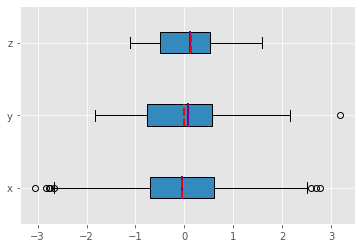

In [80]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

The parameters of .boxplot() define the following:

- **x** is your data.
- **vert** sets the plot orientation to horizontal when False. The default orientation is vertical.
- **showmeans** shows the mean of your data when True.
- **meanline** represents the mean as a line when True. The default representation is a point.
- **labels**: the labels of your data.
- **patch_artist** determines how to draw the graph.
- **medianprops** denotes the properties of the line representing the median.
- **meanprops** indicates the properties of the line or dot representing the mean.

We have three box plots here. Each of them corresponds to a single dataset (x, y, or z) and show the following:

- The **mean** is the red dashed line.
- The **median** is the purple line.
- The **first quartile** is the left edge of the blue rectangle.
- The **third quartile** is the right edge of the blue rectangle.
- The **interquartile** range is the length of the blue rectangle.
- The **range** contains everything from left to right.
- The **outliers** are the dots to the left and right.

# Histograms

**Histograms** are particularly useful when there are a large number of unique values in a dataset. The histogram divides the values from a sorted dataset into intervals, also called **bins**. Often, all bins are of equal width, though this doesn’t have to be the case. The values of the lower and upper bounds of a bin are called the **bin edges**.

A **histogram** is a great tool for quickly assessing a probability distribution that is intuitively understood by almost any audience.

The **frequency** is a single value that corresponds to each bin. It’s the number of elements of the dataset with the values between the edges of the bin. By convention, all bins but the rightmost one are half-open. They include the values equal to the lower bounds, but exclude the values equal to the upper bounds. The rightmost bin is closed because it includes both bounds. If you divide a dataset with the bin edges 0, 5, 10, and 15, then there are three bins:

- The **first and leftmost bin** contains the values greater than or equal to 0 and less than 5.
- The **second bin** contains the values greater than or equal to 5 and less than 10.
- The **third and rightmost bin** contains the values greater than or equal to 10 and less than or equal to 15.

The function **np.histogram()** is a convenient way to get data for histograms:

In [81]:
hist, bin_edges = np.histogram(x, bins=10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15])

In [82]:
bin_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

It takes the array with your data and the number (or edges) of bins and returns two NumPy arrays:

- **hist** contains the frequency or the number of items corresponding to each bin.
- **bin_edges** contains the edges or bounds of the bin.

What **_histogram()_** calculates, **_.hist()_** can show graphically:

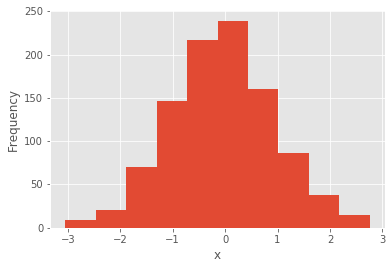

In [83]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

The first argument of **_.hist()_** is the sequence with your data. The second argument defines the edges of the bins. The third disables the option to create a histogram with cumulative values. 

It’s possible to get the histogram with the cumulative numbers of items if you provide the argument **_cumulative=True_** to **_.hist()_**:

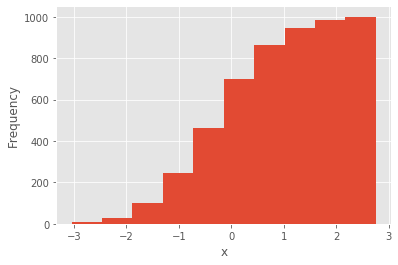

In [84]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

It shows the histogram with the cumulative values. The frequency of the first and leftmost bin is the number of items in this bin. The frequency of the second bin is the sum of the numbers of items in the first and second bins. The other bins follow this same pattern. Finally, the frequency of the last and rightmost bin is the total number of items in the dataset (in this case, 1000). 

# Pie Charts

**Pie charts** represent data with a small number of labels and given relative frequencies. They work well even with the labels that can’t be ordered (like nominal data). A pie chart is a circle divided into multiple slices. Each slice corresponds to a single distinct label from the dataset and has an area proportional to the relative frequency associated with that label.

Let’s define data associated to three labels:

In [85]:
x, y, z = 128, 256, 1024

Now, create a pie chart with **.pie()**:

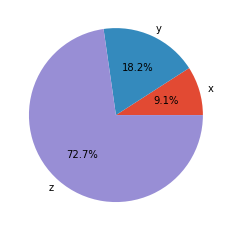

In [86]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

The first argument of **.pie()** is your data, and the second is the sequence of the corresponding labels. autopct defines the format of the relative frequencies shown on the figure.

The **pie chart** shows **x** as the **smallest** part of the circle, **y** as the **next largest**, and then **z** as the **largest** part. The percentages denote the relative size of each value compared to their sum.

# References

https://www.datavedas.com/descriptive-statistics-in-python/

https://realpython.com/

In [87]:
import numpy as np

In [88]:
np.random.binomial(n=50, p=0.4)

23